In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')

In [2]:
data = pd.read_csv('./Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Extracting Independent and dependent

In [3]:
X = data.iloc[:,[3,4]].values

**Visualize**
- Scatter

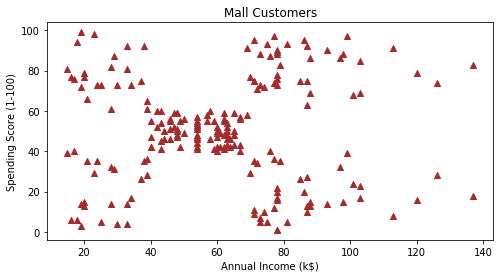

In [4]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],color='brown',marker='^')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customers')
plt.show()

### Building a Machine Learning Model
- K Means

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=2)
model.fit(X)
wcss = model.inertia_
print(wcss)
print(model.cluster_centers_)
center = model.cluster_centers_

181363.59595959596
[[79.6        50.12727273]
 [37.28888889 50.28888889]]


In [7]:
center[0][0]

79.60000000000002

In [8]:
y = model.predict(X)

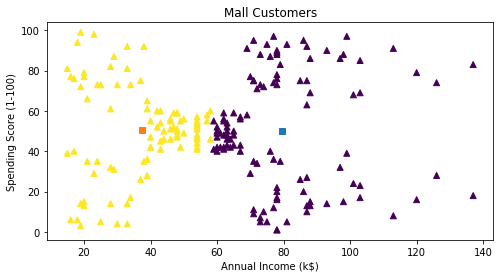

In [9]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=y,marker='^')
plt.plot(center[0][0],center[0][1],marker='s')
plt.plot(center[1][0],center[1][1],marker='s')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customers')
plt.show()

In [10]:
wcss = []
for i in range(1,200):
    model_kmeans = KMeans(n_clusters=i)
    model_kmeans.fit(X)
    wcss.append(model_kmeans.inertia_)

C:\Users\vijender\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (197). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\vijender\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (198). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\vijender\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (199). Possibly due to duplicate points in X.
  return_n_iter=True)


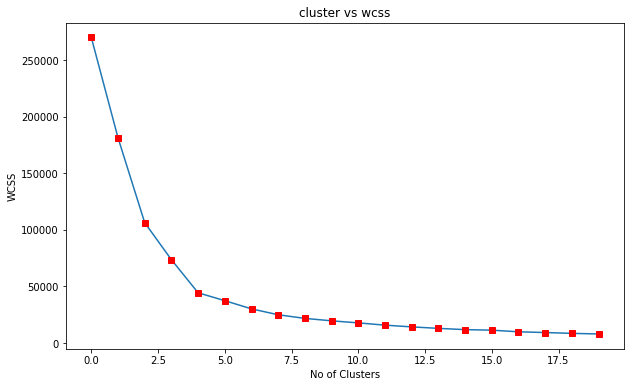

In [11]:
plt.figure(figsize=(10,6))
plt.plot(wcss[:20])
plt.plot(wcss[:20],'rs')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS'), plt.title('cluster vs wcss')
plt.show()

- from the above plot the variance is upto 5 data points so the number of clustes is 5

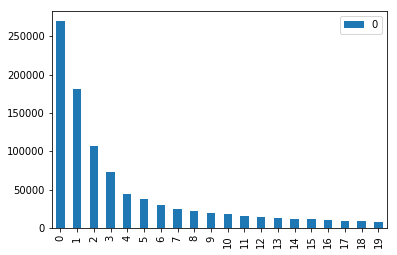

In [12]:
wc_se = pd.DataFrame(wcss[:20])
wc_se.plot.bar()
plt.show()

In [13]:
n = 5
model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
y_pred = model_kmeans.predict(X)

In [15]:
cen = model_kmeans.cluster_centers_

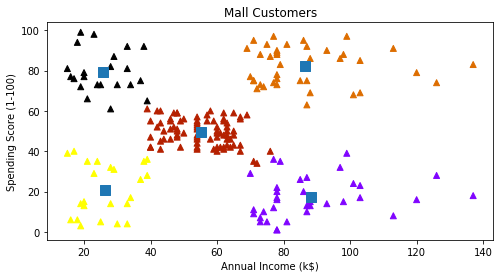

In [16]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=y_pred,marker='^',cmap = 'gnuplot')
plt.scatter(cen[:,0],cen[:,1],marker='s',s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customers')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
silhouette_score(X,y_pred)

0.553931997444648

In [19]:
silhouette_score(X,y)

0.2968969162503008

# Hierarche Clustering 

In [20]:
import scipy.cluster.hierarchy as sch

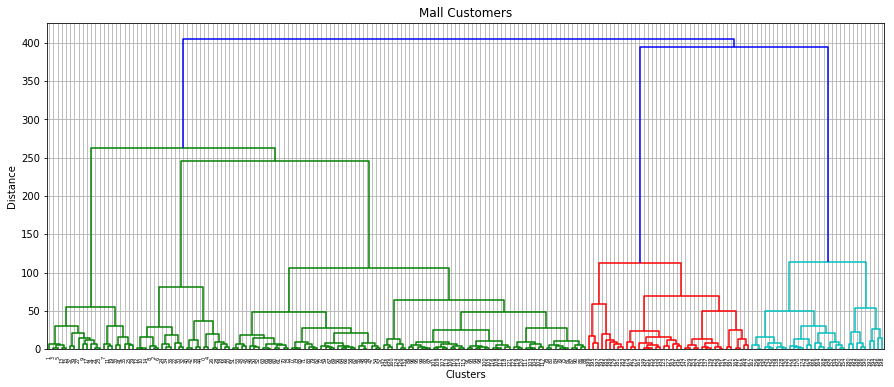

In [22]:
plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.title('Mall Customers')
plt.xticks()
plt.grid()
plt.show()

In [23]:
n =4
from sklearn.cluster import AgglomerativeClustering

In [24]:
hc = AgglomerativeClustering(n_clusters=n)

In [25]:
y = hc.fit_predict(X)

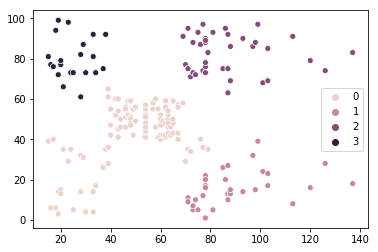

In [26]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [27]:
silhouette_score(X,y)

0.4916598193892782

In [ ]:
# if the data is go with k means clustering
# 